In [5]:
import numpy as np
import os
import matplotlib.pyplot as plt



# création des listes pour stocker les coordonnées (NTtoD, Fscore)
#std
import numpy as np

db = "MTGSetB"
path = f"C:\workspace2\Datasets\\2D\\{db}\expOut\\"
# path+="cv\\"
def getFScoreAndNTtoDoFor(deltaIoU=0.0):
    nttod_fscore_list = []
   # parcours des fichiers
    for x in range(0, 11):
        # construction du nom de fichier
        filename = f"wprior{x / 10.0:.1f}/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_{str(deltaIoU)}.txt"

        # if not os.path.exists(path+filename):
        #     filename = f"wprior{x / 10.0:.1f}/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_{str(deltaIoU)}.txt"
        #     print("Only converged does not exist for wprior",x," used normal one")
        # vérification si le fichier existe
        if os.path.exists(path+filename):
            # ouverture du fichier en mode lecture
            with open(path+filename, "r") as f:
                # parcours des lignes
                for line in f:
                    # recherche des scores Fscore et NDToD
                    if "FScore:" in line:
                        vals = line.split()
                        fscore = float(vals[1])
                        stdFscore = float(vals[-1])
                    if "Precision:" in line:
                        vals = line.split()
                        precision = float(vals[1])
                        stdPrecision = float(vals[-1])
                    if "Recall:" in line:
                        vals = line.split()
                        recall = float(vals[1])
                        stdRecall = float(vals[-1])
                    elif "NTtoD:" in line:
                        vals = line.split()
                        nttod = float(vals[1])
                        stdNTtoD = float(vals[-1])
                # ajout des coordonnées à la liste correspondante
                nttod_fscore_list.append((nttod, stdNTtoD,fscore, stdFscore,x/10.0,precision,stdPrecision,recall,stdRecall))
        else:
            print(f"{filename} n'existe pas.")
            pass
    return nttod_fscore_list

def prettyPrintForLatexIntegration(nttod_fscore_list):
    #if nttod_fscore_list is a list
    if isinstance(nttod_fscore_list, list):
        for  nttod, stdNTtoD,fscore, stdFscore,wprior,precision,stdPrecision,recall,stdRecall in nttod_fscore_list:
            print(f" {wprior} & ${fscore*100:.1f} \pm {stdFscore*100:.1f}$ & ${precision*100:.1f} \pm {stdPrecision*100:.1f}$ & ${recall*100:.1f} \pm {stdRecall*100:.1f}$ & ${nttod*100:.1f} \pm {stdNTtoD*100:.1f}$ \\\\")
    else:
        nttod, stdNTtoD,fscore, stdFscore = nttod_fscore_list
        print(f" {fscore*100:.1f} \pm {stdFscore*100:.1f} & {nttod*100:.1f} \pm {stdNTtoD*100:.1f} \\\\")


In [6]:
nttod_fscore_list = getFScoreAndNTtoDoFor()
prettyPrintForLatexIntegration(nttod_fscore_list)

wprior0.4/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.6/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.8/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior1.0/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
 0.0 & $84.6 \pm 0.2$ & $85.4 \pm 0.3$ & $83.7 \pm 0.5$ & $23.6 \pm 0.9$ \\
 0.1 & $91.2 \pm 0.2$ & $93.6 \pm 0.3$ & $88.9 \pm 0.5$ & $30.7 \pm 0.1$ \\
 0.2 & $90.3 \pm 0.7$ & $90.4 \pm 1.4$ & $90.2 \pm 0.1$ & $28.3 \pm 0.4$ \\
 0.3 & $87.5 \pm 1.1$ & $84.1 \pm 1.6$ & $91.2 \pm 0.6$ & $27.1 \pm 0.7$ \\
 0.5 & $78.1 \pm 1.0$ & $70.9 \pm 1.4$ & $87.0 \pm 0.4$ & $21.4 \pm 1.0$ \\
 0.7 & $73.7 \pm 0.4$ & $65.4 \pm 0.3$ & $84.6 \pm 0.6$ & $16.8 \pm 1.1$ \\
 0.9 & $71.9 \pm 2.0$ & $62.5 \pm 2.4$ & $84.6 \pm 1.2$ & $14.9 \pm 0.2$ \\


In [63]:
# average std error for fscore
np.average([l[1] for l in nttod_fscore_list])*100

1.2

In [64]:
nttod_fscore_list = getFScoreAndNTtoDoFor(deltaIoU=0.0)
prettyPrintForLatexIntegration(nttod_fscore_list)

wprior0.4/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.6/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.8/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior1.0/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
0.0
 60.6 \pm 4.9 & 59.5 \pm 3.5 \\
0.1
 75.3 \pm 2.1 & 61.4 \pm 1.5 \\
0.2
 73.6 \pm 0.6 & 58.4 \pm 0.3 \\
0.3
 69.4 \pm 1.7 & 56.0 \pm 0.7 \\
0.5
 43.3 \pm 0.5 & 44.2 \pm 0.7 \\
0.7
 30.5 \pm 0.6 & 34.3 \pm 1.1 \\
0.9
 26.1 \pm 0.7 & 29.8 \pm 0.6 \\


wprior0.4/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.6/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.8/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior1.0/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.


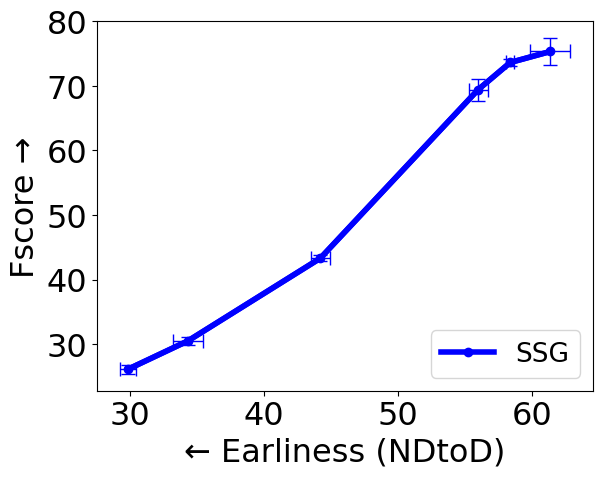

In [65]:


# création de la figure
plt.figure()
plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 4

# plt.grid(linestyle="-",linewidth=.4)
# min max
# plt.xlim(20.0, 63.0)
# plt.ylim(35.0, 85.0)

# ajout légendes des axes
plt.xlabel("← Earliness (NDtoD)")
plt.ylabel("Fscore →")

# more labels on x axis
plt.yticks([20,30,40,50,60,70,80,90,100])
plt.xticks([10,20,30,40,50,60,70,80])

# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=False)
# ax.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="CTC",  color='blue')

# ntto_d__fscore = getFScoreAndNTtoDoFor(True,True)
# ntto_d__fscore = sorted(ntto_d__fscore, key=lambda x: x[0][0])
# nttod_list, fscore_list = ntto_d__fscore
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="SSG",  color='orange')
nttod_fscore_list = getFScoreAndNTtoDoFor(deltaIoU=0.0)[1:]
nttod_fscore_list = sorted(nttod_fscore_list, key=lambda x: x[0])
plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), label="SSG",  color='blue',marker="o")
# plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list[1:2])), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list[1:2])),marker="x",markersize=10, color='yellow')
plt.errorbar(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1]*100,nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3]*100,nttod_fscore_list)), linestyle='-',color='blue',ecolor='blue',capsize=5,elinewidth=1,markeredgewidth=1)

# legend, smaller
plt.legend(fontsize=19,loc='lower right')
# affichage de la figure
# plt.show()
# plt.savefig("../Illustrations/ScoreGraphics/NTtoD_Fscore.pdf", format="pdf",bbox_inches='tight')
if not os.path.exists("../Illustrations/ScoreGraphics/"):
    os.makedirs("../Illustrations/ScoreGraphics/")
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NDToD_Fscore.png", format="png",bbox_inches='tight')
# plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NDToD_Fscore.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NDToD_Fscore.pdf", format="pdf",bbox_inches='tight')

# Evolution of Earliness and Fscore with the weightPrior variation

In [66]:
iou = 0.0
nttod_fscore_list_SGG = getFScoreAndNTtoDoFor(deltaIoU=iou)


wprior0.4/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.6/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.8/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior1.0/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.


In [67]:
plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 4
# plot the evolution of the Fscore with the weightPrior, nttod_fscore_list_HGG is the list ordered by weightPrior (from 0 to 1), use it as absciss
plt.plot( list(map(lambda fs_std:fs_std[4],nttod_fscore_list_SGG)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_SGG)), label="SSG",  color='blue',marker="o")
plt.errorbar(list(map(lambda fs_std:fs_std[4],nttod_fscore_list_SGG)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_SGG)), yerr= list(map(lambda fs_std:fs_std[3]*100,nttod_fscore_list_SGG)), linestyle='-',color='blue',ecolor='blue',capsize=5,elinewidth=1,markeredgewidth=1)
# plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_HGG)), label="HSG",  color='green',marker="o")
# resCTC = list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list_CTC))
# plt.plot([0,0.1,0.2 ,0.3,0.9,1],resCTC[:4]+resCTC[9:] , label="CTC",  color='red',marker="o")
plt.xlabel("Weight Label Prior (Ψ)")
plt.ylabel("Fscore →")
# plt.ylim(0,90)

plt.xticks([0,0.2,0.4,0.6,0.8,1])
# plt.yticks([20,30,40,50,60,70,80])
#legend top right
plt.legend(loc='upper right',fontsize=19)
#error bars
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_SGG)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_SGG)), color='blue')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_HGG)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_HGG)), color='green')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[2],nttod_fscore_list_CTC)), yerr=list(map(lambda fs_std:fs_std[3],nttod_fscore_list_CTC)), color='red')

plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_wprior.png", format="png",bbox_inches='tight')
# plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_wprior.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_wprior.pdf", format="pdf",bbox_inches='tight')

### plot the evolution of the NTtoD with the weightPrior

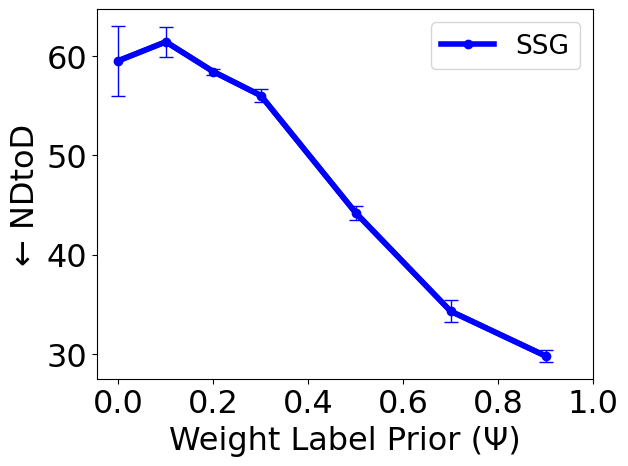

In [68]:
plt.rcParams.update({'font.size': 23})
# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 4
plt.plot(list(map(lambda fs_std:fs_std[4],nttod_fscore_list_SGG)), list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_SGG)), label="SSG",  color='blue',marker="o")
plt.errorbar(list(map(lambda fs_std:fs_std[4],nttod_fscore_list_SGG)), list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_SGG)), yerr= list(map(lambda fs_std:fs_std[1]*100,nttod_fscore_list_SGG)), linestyle='-',color='blue',ecolor='blue',capsize=5,elinewidth=1,markeredgewidth=1)
# plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_HGG)), label="HSG",  color='green',marker="o")
# resCTC = list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_CTC))
# plt.plot([0,0.1,0.2 ,0.3,0.9,1],resCTC[:4]+resCTC[9:] , label="CTC",  color='red',marker="o")
# plt.plot([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1][:3], list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_CTC[:3])), label="CTC",  color='red',marker="o")

plt.xlabel("Weight Label Prior (Ψ)")
plt.ylabel("← NDtoD")
plt.xticks([0,0.2,0.4,0.6,0.8,1])

# yticks all 5 units
minNTtod = min(list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_SGG)))
maxNTtod = max(list(map(lambda fs_std:fs_std[0]*100,nttod_fscore_list_SGG)))
# plt.yticks(np.arange(int(minNTtod)-3, int(maxNTtod)+2, 5))
# plt.yticks([20,30,40,50,60,70])
#legend
plt.legend(fontsize=19)
#error bars
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_SGG)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_SGG)), color='blue')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_HGG)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_HGG)), color='green')
# plt.errorbar([0,0.1,0.2 ,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], list(map(lambda fs_std:fs_std[0],nttod_fscore_list_CTC)), yerr=list(map(lambda fs_std:fs_std[1],nttod_fscore_list_CTC)), color='red')

plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NDToD_wprior.png", format="png",bbox_inches='tight')
# plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NDToD_wprior.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NDToD_wprior.pdf", format="pdf",bbox_inches='tight')

wprior0.4/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.6/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.8/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior1.0/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.4/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.6/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior0.8/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.
wprior1.0/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_0.0.txt n'existe pas.


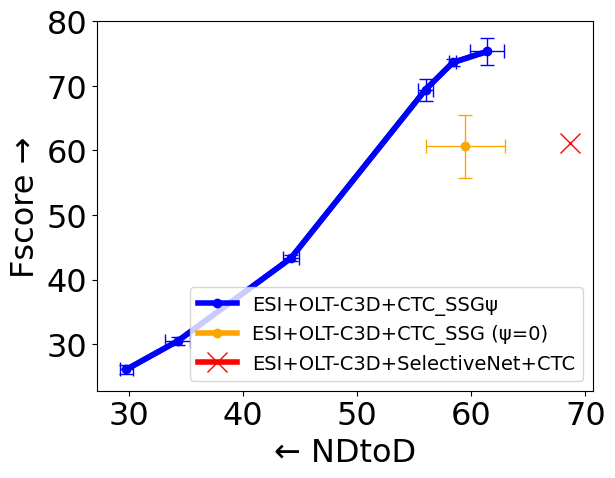

In [69]:



# création de la figure
plt.figure()
plt.rcParams.update({'font.size': 23})

# set the line width of plot higher
plt.rcParams['lines.linewidth'] = 4

# plt.grid(linestyle="-",linewidth=.4)
# min max
# plt.xlim(20.0, 63.0)
# plt.ylim(35.0, 85.0)

# ajout légendes des axes
plt.xlabel("← NDtoD")
plt.ylabel("Fscore →")

# more labels on x axis
plt.xticks([20,30,40,50,60,70,80,90])
plt.yticks([20,30,40,50,60,70,80,90])

# nttod_list, fscore_list = getFScoreAndNTtoDoFor(doSSG=False, useSG=False)
# ax.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="CTC",  color='blue')

# ntto_d__fscore = getFScoreAndNTtoDoFor(True,True)
# ntto_d__fscore = sorted(ntto_d__fscore, key=lambda x: x[0][0])
# nttod_list, fscore_list = ntto_d__fscore
# plt.plot(list(map(lambda nt_std:nt_std[0],nttod_list)), list(map(lambda fs_std:fs_std[0],fscore_list)), label="SSG",  color='orange')
nttod_fscore_list = getFScoreAndNTtoDoFor(deltaIoU=0.0)[1:]
nttod_fscore_listw0 = getFScoreAndNTtoDoFor(deltaIoU=0.0)[:1]
nttod_fscore_list = sorted(nttod_fscore_list, key=lambda x: x[0])
plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), label="ESI+OLT-C3D+CTC_SSGψ",  color='blue',marker="o")
# plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list[1:2])), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list[1:2])),marker="x",markersize=10, color='yellow')
plt.errorbar(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_list)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_list)), xerr=list(map(lambda nt_std:nt_std[1]*100,nttod_fscore_list)), yerr= list(map(lambda fs_std:fs_std[3]*100,nttod_fscore_list)), linestyle='-',color='blue',ecolor='blue',capsize=5,elinewidth=1,markeredgewidth=1)

plt.plot(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_listw0)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_listw0)), label="ESI+OLT-C3D+CTC_SSG (ψ=0)",  color='orange',marker="o")
plt.errorbar(list(map(lambda nt_std:nt_std[0]*100,nttod_fscore_listw0)), list(map(lambda fs_std:fs_std[2]*100,nttod_fscore_listw0)), xerr=list(map(lambda nt_std:nt_std[1]*100,nttod_fscore_listw0)), yerr= list(map(lambda fs_std:fs_std[3]*100,nttod_fscore_listw0)), linestyle='-',color='orange',ecolor='orange',capsize=5,elinewidth=1,markeredgewidth=1)
# plt the point (69.2 ; 56.4)
if db =="ILGDB":
    plt.plot([68.7], [61.1], marker='x', markersize=15, color="red",label="ESI+OLT-C3D+SelectiveNet+CTC")
elif db =="MTGSetB":
    plt.plot( [32.7],[83.6], marker='x', markersize=15, color="red",label="ESI+OLT-C3D+SelectiveNet+CTC")

# legend, smaller
plt.legend(fontsize=14,loc='lower right')
# affichage de la figure
# plt.show()
# plt.savefig("../Illustrations/ScoreGraphics/NTtoD_Fscore.pdf", format="pdf",bbox_inches='tight')
if not os.path.exists("../Illustrations/ScoreGraphics/"):
    os.makedirs("../Illustrations/ScoreGraphics/")
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NDToD_FscoreVS.png", format="png",bbox_inches='tight')
# plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NDToD_FscoreVS.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NDToD_FscoreVS.pdf", format="pdf",bbox_inches='tight')

In [70]:
def getFScorePerClassAndNTtoDoFor():
    doSSG = True
    useSG = True
    wCTC=0.9
    smooth=10
    deltaIoU=0.0
    vox=4
    cudi=3
    split=200
    onlyConverged=False
    nttod_fscore_list = []
   # parcours des fichiers
    for x in range(0, 11):
        # construction du nom de fichier
        onlyConvergedStr = "_convergedOnly" if onlyConverged else ""
        filename = f"wprior{x / 10.0:.1f}/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_{str(deltaIoU)}.txt"

        # if onlyConverged and not os.path.exists(path+filename):
        #     filename = f"vox{str(vox)}_cuDi{cudi}_wCTC{wCTC}_smooth{str(smooth)}_SSG{str(doSSG)}_wprior{x / 10.0:.1f}_useSG{str(useSG)}_split{str(split)}/ResultsMultiFold/BoundBasedEval/BoundedOnlineDetection_noCorrectionAllowed_{str(deltaIoU)}.txt"
        #     print("Only converged does not exist for wprior",x," used normal one")
        # vérification si le fichier existe
        if os.path.exists(path+filename):
            # ouverture du fichier en mode lecture
            with open(path+filename, "r") as f:
                # parcours des lignes
                for line in f:
                    # recherche des scores Fscore et NTtoD
                    if "FScore" in line and "per class:" in line:
                        vals = line.split(":")[1]
                        vals = vals.split(";")[1:]
                        fscores = list(map(float,vals))
                    elif "NTtoD" in line and "per class:" in line:
                        vals = line.split(":")[1]
                        vals = vals.split(";")[1:]
                        nttods = list(map(float,vals))
                # ajout des coordonnées à la liste correspondante
                nttod_fscore_list.append((fscores,nttods))
        else:
            # print(f"Le fichier {filename} n'existe pas.")
            pass
    return nttod_fscore_list[1]

In [71]:
# plot two bar diagrams (fscore and NTtoD) for each class
fscoresNTTOd01 = getFScorePerClassAndNTtoDoFor()
plt.figure()
plt.xlabel("Class label")
plt.ylabel("Fscore →")
plt.bar(range(1,len(fscoresNTTOd01[0])+1),[i*100 for i in fscoresNTTOd01[0]])

# show only from 1 to 20
plt.xlim(0.5,len(fscoresNTTOd01[0])+1-0.5)
# save
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_per_class.png", format="png",bbox_inches='tight')
# plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_per_class.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_Fscore_per_class.pdf", format="pdf",bbox_inches='tight')


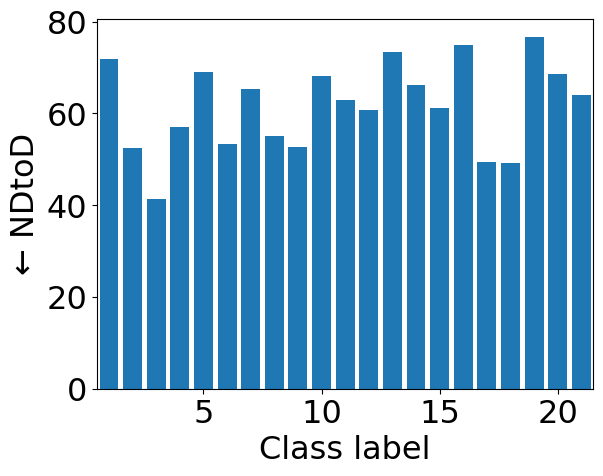

In [72]:
plt.figure()
plt.xlabel("Class label")
plt.ylabel("← NDtoD")
plt.bar(range(1,len(fscoresNTTOd01[1])+1),[i*100 for i in fscoresNTTOd01[1]])
plt.xlim(0.5,len(fscoresNTTOd01[0])+1-0.5)
# save
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_per_class.png", format="png",bbox_inches='tight')
# plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_per_class.eps", format="eps",bbox_inches='tight')
plt.savefig(f"../Illustrations/ScoreGraphics/{db}_NTtoD_per_class.pdf", format="pdf",bbox_inches='tight')